# Using Data to Combat the Opioid Epidemic

From 1999-2017, almost [400,000 people died](https://www.cdc.gov/drugoverdose/epidemic/index.html) from an overdose involving any opioid, including prescription and illicit opioids according to the [CDC](https://www.cdc.gov/drugoverdose/epidemic/index.html).

Of the over 70,000 drug overdose deaths in the US, 68% of them involved opioids. 130 Americans die from opioid-related overdoses every day.

In order to combat the epidemic of opioid misuse, there is a need for better preventative services, including:
- Raising awareness about opioid misuse and risks
- Providing states with resources to adopt evidence-based preventative strategies
- Identify areas of high need to allocate resources
- Support providers by providing tools to make evidence-based decisions

To learn more about possible problem sources to direct prevention efforts, we will analyze trends in opioid distribution, prescription, and overdose data. Before we get to this, below we coveer more on the basics of this problem. 

## Opioid basics

[Prescription opioids](https://www.cdc.gov/drugoverdose/opioids/index.html) are prescribed to treat moderate-to-severe pain, usually following surgery or injury, or health conditions such as cancer. Recently, there has been a dramatic increase in the use and acceptance of opioids for treatment of chronic, non-cancer pain such as back pain or osteoarthritis, despite serious risks and the lack of evidence about their long-term effectiveness.

In 2017 alone, 191 million prescriptions where written, or roughly a prescription for 75% of adults in the US.

Common types are oxycodone (OxyContin), hydrocodone (Vicodin), morphine, and methadone.

**Fentanyl** is a synthetic opioid pain reliever. It is many times more powerful than other opioids and is approved for treating severe pain, typically advanced cancer pain. Unfortunately, the illegal manufacture and distribution fentanyl has been on the rise in several states.

**Heroin** is an illegal opioid. Heroin use has increased across the U.S. among men and women, most age groups, and all income levels.

The most common drugs involved in prescription opioid overdose deaths include:
- Methadone
- Oxycodone (such as OxyContin®)
- Hydrocodone (such as Vicodin®)

Anyone who takes prescription opioids can become addicted to them. In fact, as many as one in four patients receiving long-term opioid therapy in a primary care setting struggles with opioid addiction. Once addicted, it can be hard to stop. In 2016, more than 11.5 million Americans reported misusing prescription opioids in the past year.

Taking too many prescription opioids can stop a person’s breathing - leading to death.

Prescription opioid overdose deaths also often involve benzodiazepines. Benzodiazepines are central nervous system depressants used to sedate, induce sleep, prevent seizures, and relieve anxiety. Examples include alprazolam (Xanax®), diazepam (Valium®), and lorazepam (Ativan®). Avoid taking benzodiazepines while taking prescription opioids whenever possible.

## Exploring patterns of opioid distribution:

Counties with readily-available opioid supplies have increased overdoses [source?]. Are there certain pharamacies or providers that increased their distribution of opioids over time? 
A study by the Washington Post found that nearly a [half of all opioids](https://www.washingtonpost.com/graphics/2019/investigations/pharmacies-pain-pill-map/) were bought by 15% of pharmacies in the US. The discrepancy in the number of opioids distributed by these pharmacies has real impact on the communities they serve: opioid-related deaths are nearly [3 times higher](https://www.washingtonpost.com/graphics/2019/investigations/pharmacies-pain-pill-map/) in counties with the highest number of pills available. 

### ARCOS dataset
As required by the Controlled Substances Act of 1970, drug manufacturer's and distributors are [required to report](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6901007/) controlled substance transactions to the Drug Enforcement Agency. This data is made publically available through the Automated Reports and Consolidated Ordering System (ARCOS) dataset. The ARCOS dataset is a detailed set of transactions between opioid manufacturers, distributors, and prescribers from 2006-2012 and includes prescription data for VA patients, military personnel, Indiana Health Servicers, dispensing practitioners, and narcotic treatment programs.

As the full ARCOS dataset is over 400 million rows of transactions, we've subsetted the data to focus on New York and New Jersey. However, the full dataset can be found [here](https://www.washingtonpost.com/national/2019/07/18/how-download-use-dea-pain-pills-database/?arc404=true).
- [ARCOS data dictionary]()

### amfAR Opioid and Health Indicators database
[amfAR's](https://opioid.amfar.org/) Opioid & Health Indicators database is a free web platform designed to support communities, lawmakers, and advocates in making informed decisions about the opioid epidemic and its impact on HIV and hepatitis C. The site is a window into the opioid epidemic unfolding in every American's backyard—it provides local to national statistics using reliable data sources on new HIV and hepatitis C infections, opioid use and overdose death rates, and the availability of services like drug treatment programs and syringe exchange services. In addition, users can examine data at the state or the county levels to see the differential impact of the opioid epidemic by state or within states. You can download the full dataset [here](https://opioid.amfar.org/indicator/drugdeaths)
- [amfAR data dictionary]()


### City Health Dashboard dataset
City Health Dashboard is a collaboration between NYU and the Robert Wood Johnson foundation to map the various metrics of health and health equity in 500 cities across the US. As adjoining neighborhoods can have drastic differences in opportunites for health, City Health Dashboard aims to provide data that gives the full picture of health and factors that influence health at the city and neighborhood level, including [opioid-related deaths](https://www.cityhealthdashboard.com/metric/26). This dataset provides tract-level health metrics for cities with populations greater than 66,000. You can find out more about City Health Dashboard [here](https://www.cityhealthdashboard.com/about).


In this track we'll focus on the New York region to understand the distribution patterns of opioids in New York state, and the players involved in contributing to the opioid crisis by using transaction data from ARCOS and opioid-death data from City Health Dashboard. Some of the questions that we can answer with this data are:
- Identify pharmacies and other buyers of opioids who have rapidly increased their distribution and profile of opioids from 2006-2012
- Identify and visualize counties and tracts that have been flooded with opioid prescriptions
- Perform a regression on the amount of distribution to a pharmacy or area
- Identify major manufacturers shipping opioids to the mid-Atlantic region
- Visualize the geographic spread of transactions

For some inspiration, some examples of [how journalists have used this](https://www.washingtonpost.com/national/2019/08/12/post-released-deas-data-pain-pills-heres-what-local-journalists-are-using-it/) data at national and local levels:
- The volume of pills handled by the companies climbed as the epidemic surged, increasing 51 percent during a seven-year time frame.
-  America’s largest drug companies distributed billions of oxycodone and hydrocodone pain pills across the country between 2006 and 2012. Just six companies distributed 75 percent of the pills during this period.
- Records show that by 2006, as the number of overdose deaths grew, a handful of obscure generic-drug manufacturers were selling the bulk of opioid pills flooding the country.

## Data Exploration

### ARCOS dataset

The Washington Post has provided the ARCOS dataset in full, as well as state- and county-level datasets. 

**You can search and download the ARCOS files [here](https://www.washingtonpost.com/graphics/2019/investigations/dea-pain-pill-database/#download-resources).**

After signing up with a Washington Post account, select **New York** and **State-Wide** and then **Download raw data for New York**. Since this dataset is 5-6 GB, it's easiest to start exploring with a subset of the data.

In [20]:
%matplotlib inline

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
chunksize = 500000  
i = 0
for chunk in (pd.read_csv('data/arcos-ny-statewide-itemized.csv', chunksize=chunksize)):
    i += 1
# for chunk in (pd.read_csv('data/opioid_data/arcos-ny-statewide-itemized_sample.csv', chunksize=chunksize)):
#     print(chunk.shape)
#     display(chunk.head())
#     print(chunk.columns)
#     break
    print(i)

/Users/mattheweng/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,5,22,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


1
2


/Users/mattheweng/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,5,22,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18


/Users/mattheweng/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,5,26) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


19
20
21
22
23


In [53]:
nys = pd.read_csv('data/arcos-ny-statewide-itemized.csv')

In [54]:
nys['TRANSACTION_YEAR'] = nys['TRANSACTION_DATE'].astype(str).apply(lambda x: x[-4:])
nys_2012 = nys[nys['TRANSACTION_YEAR'] == '2012']

In [55]:
nys_2012.shape

(1355370, 43)

In [56]:
nys_2012.to_csv('data/arcos-ny-statewide-itemized-2012.csv', index=False)

In [57]:
nys_2006 = nys[nys['TRANSACTION_YEAR'] == '2006']
nys_2006.to_csv('data/arcos-ny-statewide-itemized-2006.csv', index=False)

In [9]:
chunksize = 500000   
for chunk in (pd.read_csv('data/arcos-ny-statewide-itemized.csv', chunksize=chunksize)):
# for chunk in (pd.read_csv('data/opioid_data/arcos-ny-statewide-itemized_sample.csv', chunksize=chunksize)):
    print(chunk.shape)
    display(chunk.head())
    print(chunk.columns)
    break

/Users/mattheweng/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (3,5,22,26,27) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(500000, 42)


,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,...,DOSAGE_UNIT,TRANSACTION_ID,Product_Name,Ingredient_Name,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Reporter_family,dos_str,MME
0,PB0020052,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,NaN,GOUVERNEUR,NY,13642,SAINT LAWRENCE,...,400.0,1079,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","KPH Healthcare Services, Inc.",10.0,2421.6
1,PB0020052,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,NaN,GOUVERNEUR,NY,13642,SAINT LAWRENCE,...,1000.0,252,HYDROCODONE BIT.7.5MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","KPH Healthcare Services, Inc.",7.5,4540.5
2,PB0020052,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,NaN,GOUVERNEUR,NY,13642,SAINT LAWRENCE,...,200.0,705,HYDROCODONE/IBUPROFEN 7.5MG/200MG TA,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,Amneal Pharmaceuticals LLC,"KPH Healthcare Services, Inc.",7.5,908.1
3,PB0020052,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,NaN,GOUVERNEUR,NY,13642,SAINT LAWRENCE,...,200.0,821,HYDROCODONE BIT. 7.5MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","KPH Healthcare Services, Inc.",7.5,908.1
4,PB0020052,DISTRIBUTOR,"KPH HEALTHCARE SERVICES, INC.",KINNEY DRUGS WAREHOUSE,520 EAST MAIN ST.,NaN,GOUVERNEUR,NY,13642,SAINT LAWRENCE,...,500.0,1148,HYDROCODONE BIT. 10MG/ACETAMINOPHEN,HYDROCODONE BITARTRATE HEMIPENTAHYDRATE,TAB,1.0,"Actavis Pharma, Inc.","KPH Healthcare Services, Inc.",10.0,3027.0


Index(['REPORTER_DEA_NO', 'REPORTER_BUS_ACT', 'REPORTER_NAME',
       'REPORTER_ADDL_CO_INFO', 'REPORTER_ADDRESS1', 'REPORTER_ADDRESS2',
       'REPORTER_CITY', 'REPORTER_STATE', 'REPORTER_ZIP', 'REPORTER_COUNTY',
       'BUYER_DEA_NO', 'BUYER_BUS_ACT', 'BUYER_NAME', 'BUYER_ADDL_CO_INFO',
       'BUYER_ADDRESS1', 'BUYER_ADDRESS2', 'BUYER_CITY', 'BUYER_STATE',
       'BUYER_ZIP', 'BUYER_COUNTY', 'TRANSACTION_CODE', 'DRUG_CODE', 'NDC_NO',
       'DRUG_NAME', 'QUANTITY', 'UNIT', 'ACTION_INDICATOR', 'ORDER_FORM_NO',
       'CORRECTION_NO', 'STRENGTH', 'TRANSACTION_DATE', 'CALC_BASE_WT_IN_GM',
       'DOSAGE_UNIT', 'TRANSACTION_ID', 'Product_Name', 'Ingredient_Name',
       'Measure', 'MME_Conversion_Factor', 'Combined_Labeler_Name',
       'Reporter_family', 'dos_str', 'MME'],
      dtype='object')


### mfAR Opioid and Health Indicators database

The data dictionary can be found [here](https://opioid.amfar.org/download/?content=datadict)

In [8]:
opioid_rates = pd.read_csv('data/opioid_data/amfAR-countydata.csv')
opioid_rates.head()

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,COUNTY,STATE,STATEABBREVIATION
0,1,3,2004,SA_fac,2.0,Baldwin County,Alabama,AL
1,1,15,2004,SA_fac,3.0,Calhoun County,Alabama,AL
2,1,33,2004,SA_fac,1.0,Colbert County,Alabama,AL
3,1,41,2004,SA_fac,1.0,Crenshaw County,Alabama,AL
4,1,43,2004,SA_fac,3.0,Cullman County,Alabama,AL


We'll format the `County` column to match that found in the ARCOS dataset in order to join the datasets. The opioid rate data includes several other health metrics, but we'll focus on opioid drug rates for NY counties.

In [11]:
opioid_rates['COUNTY_FORMAT'] = opioid_rates['COUNTY'].str.replace(' County', '').str.upper()
opioid_rates['YEAR'] = opioid_rates['YEAR'].astype(str)

opioid_rates = opioid_rates.loc[(opioid_rates['STATE'] == 'New York') & (opioid_rates['INDICATOR'] == 'opioid_RxRate'), 
                                ['YEAR', 'COUNTY_FORMAT', 'VALUE']] \
                            .drop_duplicates()
    
arcos = chunk.copy()
arcos['TRANSACTION_YEAR'] = arcos['TRANSACTION_DATE'].astype(str).apply(lambda x: x[-4:])
arcos = pd.merge(arcos, opioid_rates,
             how='left', 
             left_on=['BUYER_COUNTY', 'TRANSACTION_YEAR'],
             right_on=['COUNTY_FORMAT', 'YEAR']) \
            .rename(columns={'VALUE': 'OPIOID_RATE'})

In [13]:
arcos[['BUYER_COUNTY', 'TRANSACTION_YEAR', 'COUNTY_FORMAT', 'OPIOID_RATE']].head()

,BUYER_COUNTY,TRANSACTION_YEAR,COUNTY_FORMAT,OPIOID_RATE
0,OSWEGO,2006,OSWEGO,35.8
1,OSWEGO,2006,OSWEGO,35.8
2,OSWEGO,2007,OSWEGO,40.5
3,OSWEGO,2007,OSWEGO,40.5
4,OSWEGO,2007,OSWEGO,40.5


It's usually a good idea when working with a new dataset to get a feel for the data. We can look at covariance between variables. 

For instance if we take the original amFAR dataset where we got our opioid rates from, we see there are other indicator types

In [14]:
#health_metrics = pd.read_csv('data/OpioidDB/countydata.csv')
health_metrics = pd.read_csv('data/opioid_data/amfAR-countydata.csv')
health_metrics.head()

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,COUNTY,STATE,STATEABBREVIATION
0,1,3,2004,SA_fac,2.0,Baldwin County,Alabama,AL
1,1,15,2004,SA_fac,3.0,Calhoun County,Alabama,AL
2,1,33,2004,SA_fac,1.0,Colbert County,Alabama,AL
3,1,41,2004,SA_fac,1.0,Crenshaw County,Alabama,AL
4,1,43,2004,SA_fac,3.0,Cullman County,Alabama,AL


In [15]:
health_metrics['INDICATOR'].value_counts()

unemploy                 61141
drugdeathrate_est        47115
opioid_RxRate            38640
SA_fac                   33739
Chlamydia_rate           32223
Chlamydia                32223
Gonorrhea_rate           32212
Gonorrhea                32212
HIV_diagnoses_rate       32200
Syphilis_rate            32200
Syphilis_cong_rate       32200
HIV_diagnoses            32200
Syphilis_cong            32200
Syphilis                 32200
Med_SA_fac               29227
HIV_diagnosed_rate       28980
HIV_diagnosed            28980
HICVT_fac                28506
pop_14+                  28278
Population               28278
pop_hispanic             28278
drugdeaths               25760
drugdeathrate            25760
Med_HICVT_fac            24005
pct_poverty_pop          19322
pctunins                 19322
pctunins_pop             19322
pct_poverty              19322
HCVacuterate             19320
HCVacute                 19320
MH_fac                   13512
SMAT_fac                 13504
Med_MH_f

We can pivot the data:

In [16]:
health_metrics['key'] = health_metrics.apply(lambda x: '{}-{}-{}'.format(str(x['STATEFP']), str(x['COUNTYFP']), str(x['YEAR'])), axis=1)
health_metrics = health_metrics.pivot_table(index='key', columns='INDICATOR', values='VALUE', aggfunc=np.sum)

And take a look at covariance and correlation for several metrics

In [17]:
# Covariance
display(health_metrics[['drugdeathrate', 'opioid_RxRate', 'Chlamydia_rate']].cov())

# Correlation
display(health_metrics[['drugdeathrate', 'opioid_RxRate', 'Chlamydia_rate']].corr())

INDICATOR,drugdeathrate,opioid_RxRate,Chlamydia_rate
INDICATOR,,,
drugdeathrate,92.109084,65.532725,264.022719
opioid_RxRate,65.532725,2738.494196,1747.447235
Chlamydia_rate,264.022719,1747.447235,70371.533674


INDICATOR,drugdeathrate,opioid_RxRate,Chlamydia_rate
INDICATOR,,,
drugdeathrate,1.000000,0.130796,0.103871
opioid_RxRate,0.130796,1.000000,0.125091
Chlamydia_rate,0.103871,0.125091,1.000000


**Are there any other variables that would be interesting to look at in the ARCOS dataset?**

It's also usually good to look at the distribution of our variables. For instance how are the number of transactions distributed across time? Counties?

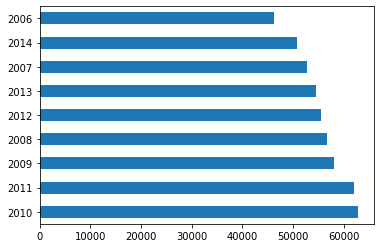

In [22]:
# Distribution of transactions across time

arcos['TRANSACTION_YEAR'].value_counts().plot.barh()

In [ ]:
## ADD DATA DICTIONARY FOR ARCOS
## DRUG CODE, 
## NDC NO
## Looking at the product name 


## What is the distribution structure of opioids?

If we take a look at some of the reporting families at the top and bottom, we see some major players. There are several types of buyers and reporters in the data:
- Manufacturers
    - Purdue Pharma LLC
- Distributors
    - McKesson Corporation, Cardinal Health
- Buyers
    - Clinics

<Figure size 432x288 with 0 Axes>

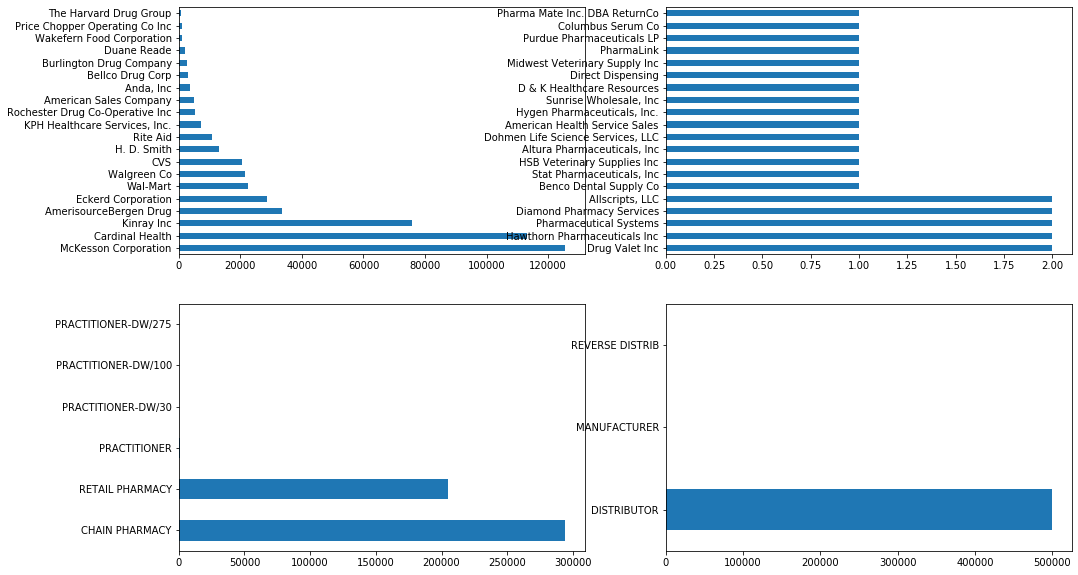

In [77]:
fig = plt.figure()

plt.figure(figsize=(16,10))


def plot_value_counts(series, top_results=True, limit=20):
    
    if top_results:
        return series.value_counts()[:limit].plot.barh()
    
    return series.value_counts()[-limit:].plot.barh()

plot_params = [('Reporter_family', True, 20), 
               ('Reporter_family', False, 20), 
               ('BUYER_BUS_ACT', False, 20),
               ('REPORTER_BUS_ACT', False, 20)
              ]

for i, plot_param in enumerate(plot_params):
    plt.subplot(2,2,i+1)
        
    col, select_top_vals, val_limit = plot_param
    plot_value_counts(arcos[col], select_top_vals, val_limit)
    
    

In [47]:
arcos[arcos['BUYER_NAME'] == 'BLACK, ROBERT M', '']

,REPORTER_DEA_NO,REPORTER_BUS_ACT,REPORTER_NAME,REPORTER_ADDL_CO_INFO,REPORTER_ADDRESS1,REPORTER_ADDRESS2,REPORTER_CITY,REPORTER_STATE,REPORTER_ZIP,REPORTER_COUNTY,...,Measure,MME_Conversion_Factor,Combined_Labeler_Name,Reporter_family,dos_str,MME,TRANSACTION_YEAR,YEAR,COUNTY_FORMAT,OPIOID_RATE
319994,RP0334540,DISTRIBUTOR,PRIORITY HEALTHCARE DISTRIBUTION,DBA CURASCRIPT SD SPECIALTY,DISTRIBUTION,2297 SOUTHWEST BLVD SUITE #D,GROVE CITY,OH,43123,FRANKLIN,...,TAB,1.0,SpecGx LLC,Priority Healthcare,7.5,454.05,2007,2007,ONONDAGA,52.3


### Metrics for Opioid prescriptions

Some of the questions that we're interested in answering are to :



**Working in groups, choose and tackle one of these questions using the data.**

## How do pharmacy-distributed opioids relate to opioid overdose rates?

Identify and visualize counties and tracts that have been flooded with opioid prescriptions
- Identify pharmacies and other buyers of opioids who have rapidly increased their distribution and strength profile of opioids from 2006-2012
  - How does the profile of pharmacies change in the New York region? 
  - Are there attributes of pharmacies that determine what the 

Is there a relationships between the distribution of opioids to an area and the number of fatal overdoses? Perform a regression on the amount of distribution to a pharmacy or area. 

A major strategy for overdose prevention is called [harm reduction](https://harmreduction.org/overdose-prevention/awareness-is-not-enough/) intervention, which aims to reduce the negative consequences associated with drug use. Research has demonstrated that methadone and buprenorphine, the gold standard for treating opioid use disorders, protects against fatal overdose and extends the life of people in treatment. [Naloxone](https://www.drugabuse.gov/related-topics/opioid-overdose-reversal-naloxone-narcan-evzio) is another medication used to rapidly reverse opioid overdose by acting as an antagonist that binds to opioid receptors.

There is a need to provide greater resources for free naloxone and safe injection sites to prevent overdose deaths. 

- When were naloxone sites established?
- How have overdose deaths, ER visits changed in response to Naloxone and other resources?

Manufacturer's have been highlighted as profiteers of the opioid crisis, contributing to the unnecessary and over-prescription of these additictive substances. 
- Identify major manufacturers shipping opioids to the New York region
- Visualize the geographic spread of transactions

In [4]:
deaths = pd.read_csv('data/opioid_data/NYS-Vital_Statistics_Opioid-Related_Deaths_by_County_2003.csv')
visits = pd.read_csv('data/opioid_data/NYS-All_Payer_Opioid-Related_Facility_Visits_2010_SPARCS.csv')
burden = pd.read_csv('data/opioid_data/NYS-Opioid_exportData.csv')

In [5]:
deaths

,Year,County,Opioid Poisoning Deaths
0,2003,Albany,4
1,2003,Allegany,0
2,2003,Bronx,105
3,2003,Broome,5
4,2003,Cattaraugus,1
...,...,...,...
925,2017,Washington,8
926,2017,Wayne,7
927,2017,Westchester,116
928,2017,Wyoming,6


In [6]:
visits

,Year,Patient County Code,Patient County Name,Rural/Urban,Payer,ER Opioid,ER Visits,ER Rate Per 1000,Inpatient ER Opioid,Inpatient ER Discharges,...,Ambulatory Surgery Rate Per 1000,Outpatient Opioid,Outpatient Visits,Outpatient Rate Per 1000,Other Outpatient Total Opioid,Other Outpatient Total Discharges,Other Outpatient Total Rate Per 1000,Overall Opioid,Overall Discharges,Overall Rate Per 1000
0,2013,1.0,Albany,Urban,Medicaid,22,"35,379",0.622,15,"3,408",...,0.0,0,"29,976",0.0,0,"33,921",0.0,38,"76,237",0.498
1,2010,1.0,Albany,Urban,Medicare,13,"13,486",0.964,13,"10,785",...,0.0,0,105,0.0,0,"9,616",0.0,27,"37,257",0.725
2,2010,2.0,Allegany,Rural,Medicaid,0,"3,917",0.000,2,422,...,0.0,0,26,0.0,0,842,0.0,3,"5,891",0.509
3,2013,2.0,Allegany,Rural,Medicaid,1,"6,273",0.159,1,292,...,0.0,0,"5,612",0.0,0,"6,388",0.0,2,"13,427",0.149
4,2010,2.0,Allegany,Rural,Other,1,451,2.217,0,59,...,0.0,0,10,0.0,0,118,0.0,1,675,1.481
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1945,2014,42.0,Schenectady,Urban,Unknown,0,10,0.000,0,0,...,0.0,0,4,0.0,0,6,0.0,0,17,0.000
1946,2010,36.0,Otsego,Rural,Unknown,4,"2,884",1.387,0,11,...,0.0,0,0,0.0,0,427,0.0,4,"3,340",1.198
1947,2012,12.0,Delaware,Rural,Unknown,1,707,1.414,0,21,...,0.0,0,955,0.0,0,994,0.0,1,"1,731",0.578
1948,2014,38.0,Rensselaer,Urban,Unknown,0,3,0.000,0,0,...,0.0,0,0,0.0,0,1,0.0,0,6,0.000


In [47]:
def create_fips_code(row):
    
    FIPS_6 = str(row['STATEFP']).zfill(2) + str(row['COUNTYFP']).zfill(3)
    
    return FIPS_6

opioid_rates['FIPS_6'] = opioid_rates.apply(create_fips_code, axis=1)

In [48]:
opioid_rates.head()

,STATEFP,COUNTYFP,YEAR,INDICATOR,VALUE,COUNTY,STATE,STATEABBREVIATION,FIPS_6
0,1,3,2004,SA_fac,2.0,Baldwin County,Alabama,AL,01003
1,1,15,2004,SA_fac,3.0,Calhoun County,Alabama,AL,01015
2,1,33,2004,SA_fac,1.0,Colbert County,Alabama,AL,01033
3,1,41,2004,SA_fac,1.0,Crenshaw County,Alabama,AL,01041
4,1,43,2004,SA_fac,3.0,Cullman County,Alabama,AL,01043


In [26]:

# Create State FIP code
# state_fips = pd.read_csv('data/state-geocodes-v2016.csv')

# opioid_rates = pd.merge(opioid_rates, state_fips, left_on='STATE', right_on='Name', how='left')
# opioid_rates['State (FIPS)'].astype(str).str.zfill(2)
# Leaves out Puerto Rico